<a href="https://colab.research.google.com/github/meganhsu/ML100-Days/blob/master/Day70_Keras_Mnist_MLP_h256_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
#建立模型
model=Sequential()
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256,
                input_dim=256,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=128,
               input_dim=256,
               kernel_initializer='normal',
               activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))


In [9]:
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [0]:
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))


In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))


In [19]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [20]:
# 載入之前訓練的模型¶
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [27]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 138us/step - loss: 1.1740 - acc: 0.6722 - val_loss: 0.4067 - val_acc: 0.8882
Epoch 2/10
48000/48000 [==============================] - 4s 86us/step - loss: 0.3671 - acc: 0.8949 - val_loss: 0.2955 - val_acc: 0.9147
Epoch 3/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.2866 - acc: 0.9168 - val_loss: 0.2450 - val_acc: 0.9303
Epoch 4/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.2383 - acc: 0.9310 - val_loss: 0.2112 - val_acc: 0.9397
Epoch 5/10
48000/48000 [==============================] - 4s 86us/step - loss: 0.2014 - acc: 0.9413 - val_loss: 0.1804 - val_acc: 0.9497
Epoch 6/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.1738 - acc: 0.9497 - val_loss: 0.1634 - val_acc: 0.9541
Epoch 7/10
48000/48000 [==============================] - 4s 87us/step - loss: 

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

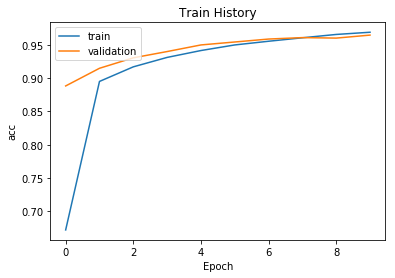

In [29]:
show_train_history(train_history,'acc','val_acc')

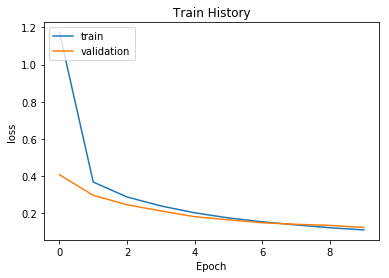

In [30]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [31]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 35us/step

accuracy= 0.9629
